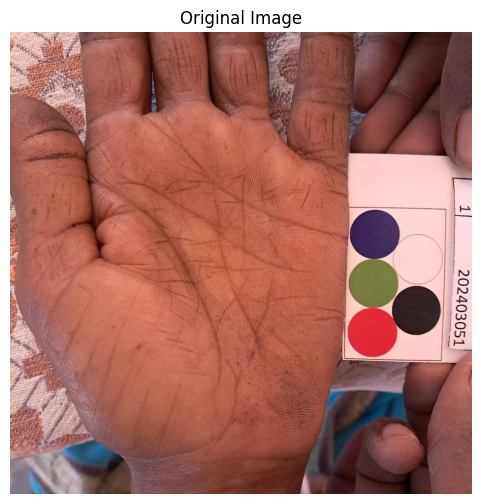

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'Original Palm.jpg'  # Path to the input image
image = cv2.imread(image_path)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


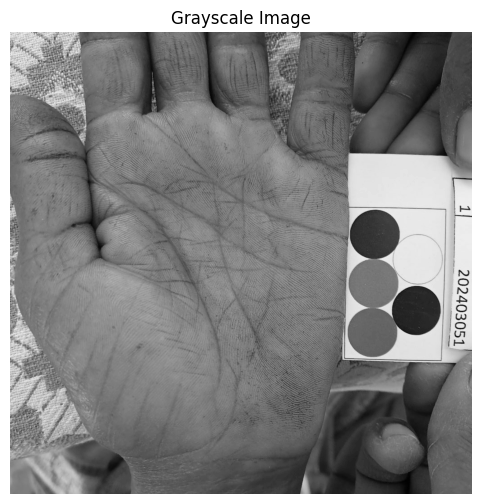

In [8]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


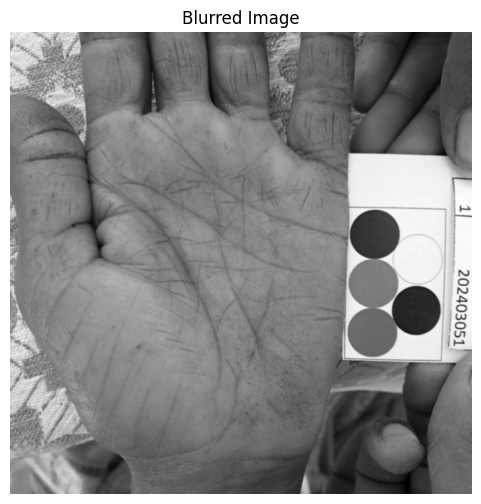

In [9]:
# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()


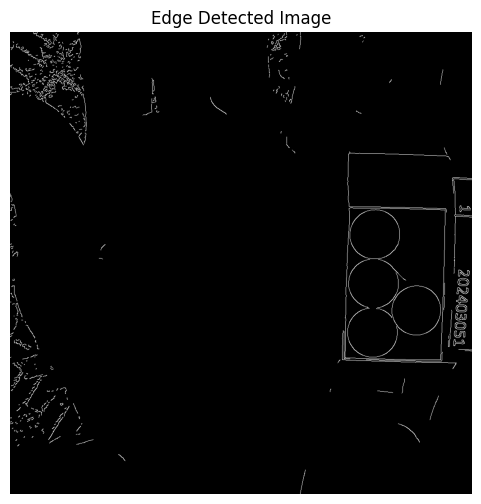

In [10]:
# Apply Canny edge detection
edges = cv2.Canny(blurred_image, 200, 150)

# Display the edges
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title("Edge Detected Image")
plt.axis("off")
plt.show()


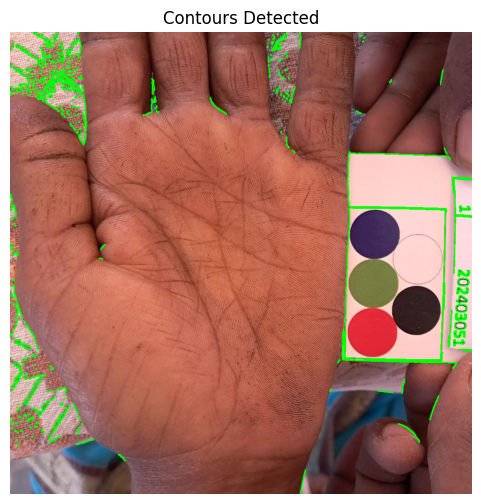

In [11]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

# Convert BGR to RGB for correct display
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Display the contours
plt.figure(figsize=(6, 6))
plt.imshow(contour_image_rgb)
plt.title("Contours Detected")
plt.axis("off")
plt.show()


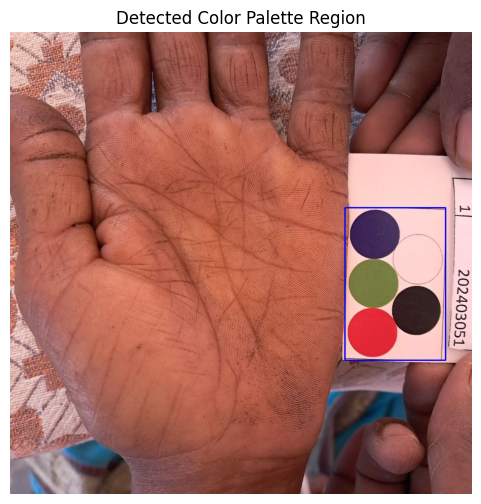

In [12]:
# Identify the largest contour (Assuming it's the color palette)
palette_contour = None
max_area = 0

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    if area > max_area:
        max_area = area
        palette_contour = (x, y, w, h)

# Draw a bounding box around the detected color palette region
bounding_box_image = image.copy()

if palette_contour:
    x, y, w, h = palette_contour
    cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box

# Convert BGR to RGB for display
bounding_box_image_rgb = cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB)

# Display the bounding box around the detected palette
plt.figure(figsize=(6, 6))
plt.imshow(bounding_box_image_rgb)
plt.title("Detected Color Palette Region")
plt.axis("off")
plt.show()


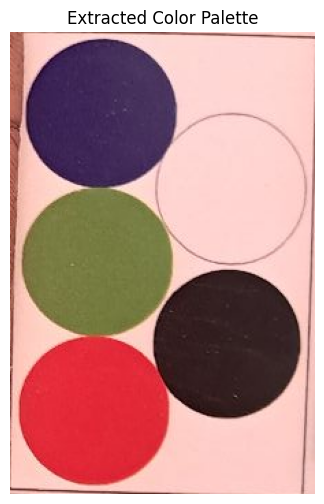

In [13]:
# Extract and save the color palette region if found
if palette_contour:
    x, y, w, h = palette_contour
    palette_image = image[y:y+h, x:x+w]

    # Save the extracted palette
    palette_image_path = '/mnt/data/extracted_palette.jpg'  
    cv2.imwrite(palette_image_path, palette_image)

    # Convert BGR to RGB for correct display
    palette_image_rgb = cv2.cvtColor(palette_image, cv2.COLOR_BGR2RGB)

    # Display the extracted color palette
    plt.figure(figsize=(6, 6))
    plt.imshow(palette_image_rgb)
    plt.title("Extracted Color Palette")
    plt.axis("off")
    plt.show()
else:
    print("No palette region detected.")
